# Plotting for Exploratory data analysis (EDA)

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


#### Importing Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm

##### Importing Haberman Dataset

In [5]:
haberman = pd.read_csv('/content/haberman.csv')
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


##### How many data-points and features?

In [ ]:
print(haberman.shape)

(306, 4)


##### What are the column names in our dataset?

In [ ]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


###### How many data points for each class are present?

In [ ]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

#### Observation
##### 1.This is an Imbalanced dataset as one Class object is more than the other

###### Checking for Missing Values in the dataset

In [ ]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


##### Calculating MEAN, STD DEV, Percentiles, MIN and MAX


In [ ]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observations
##### 1.From the above results we can observe that MEAN & MEDIAN for AGE and age are almost equal
##### 2.There is notably a large difference between 75th %tile and max values of NODES
##### 3.MEDIAN & MEAN for NODES are significantly different as there are OUTLIERS in the NODES data which can be visualized using BOX Plot

##### Plotting Heat Map to understand correlation b/w independent variables

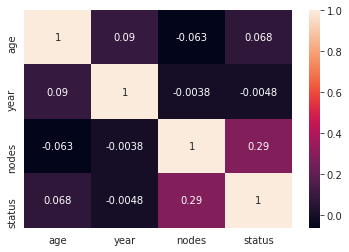

In [ ]:
sns.heatmap(haberman.corr(), annot = True);
plt.show()

#### Observations
##### 1.From the below Heat MAp we can see that NODES is negatively correlated with YEAR & AGE

##### Performing Univariate Analysis using Histogram/PDF Plots

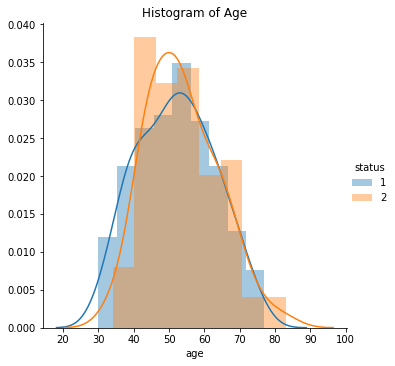

In [6]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title('Histogram of Age')
plt.show();

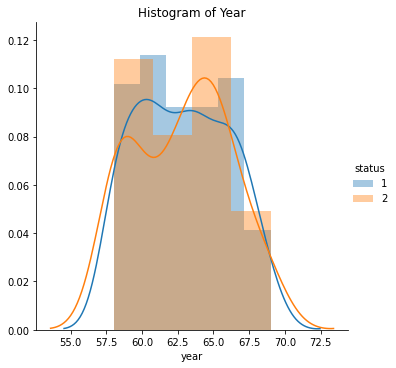

In [7]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of Year')
plt.show();

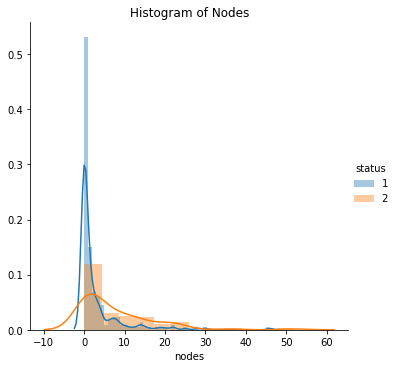

In [8]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of Nodes')
plt.show();

#### Observations from Histogram/PDF
##### 1.The Status class is clearly overlapping w.r.t all the three variables and we cannot predict the STATUS based on one variable
##### 2.For nodes the data is left skewed i.e. Negatively Skewed

##### Plotting CDF Plots

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


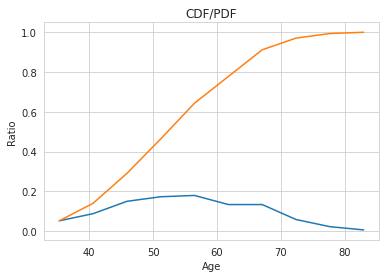

In [ ]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('CDF/PDF')
plt.show();


#### Observations
#####  1.From above we can see that the 50% of records are less than age 55 and 90% records are less than age 67

[0.11764706 0.08823529 0.         0.09150327 0.         0.08496732
 0.         0.0751634  0.         0.09803922 0.10130719 0.
 0.09150327 0.         0.09150327 0.         0.08169935 0.
 0.04248366 0.03594771]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


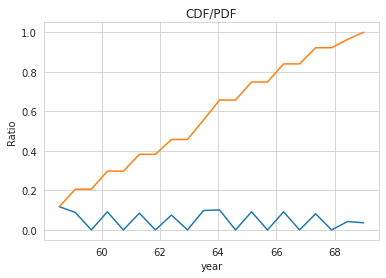

In [ ]:
counts, bin_edges = np.histogram(haberman['year'], bins=20, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.ylabel('Ratio')
plt.title('CDF/PDF')
plt.show();

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


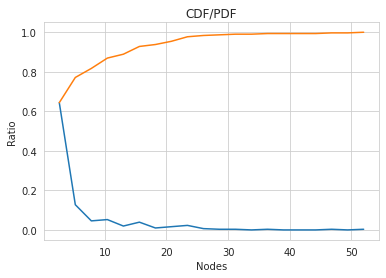

In [ ]:
counts, bin_edges = np.histogram(haberman['nodes'], bins=20, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Nodes')
plt.ylabel('Ratio')
plt.title('CDF/PDF')
plt.show();

##### Plotting Box Plots

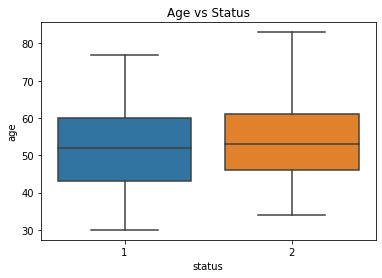

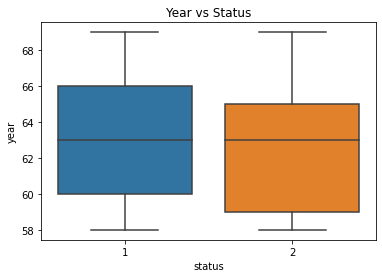

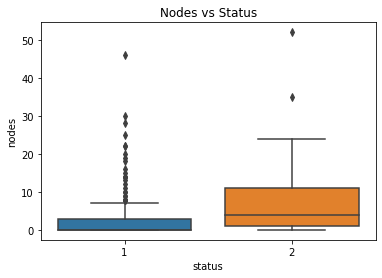

In [10]:
plt.figure(1)
sns.boxplot(x='status',y='age', data=haberman)
plt.title('Age vs Status')
plt.show()

plt.figure(2)
sns.boxplot(x='status',y='year', data=haberman)
plt.title('Year vs Status')
plt.show()

plt.figure(3)
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Nodes vs Status')
plt.show()

#### Observations
##### 1.From the above BOX PLOT we can conculde that there are OUTLIERS in NODES and is above the 3rd Quartile
##### 2.These OUTLIERS have to be treated to get proper classification

##### Bivariant Analysis using Pair Plot

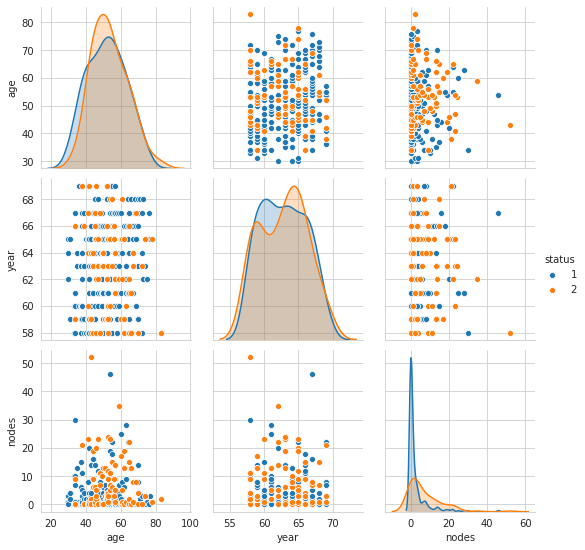

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=2.5);
plt.show()

### Final Observations from EDA

##### 1.Imbalanced dataset. Status Class 1 > Class 2

##### 2.We cannot use only one variable to classify STATUS

##### 3.No two variables can be used to classify STATUS

##### 4.There are OUTLIERS in the NODES data which has to be treated to get better classification

##### 5.Age column is Normally distributed

##### 6.From the Heat MAp we can see that NODES is negatively correlated with YEAR & AGE